In [1]:
import math as m
import csv
from matplotlib import pyplot as plt

In [60]:
# Constants initialization
n = 0.1
a_0 = 0.5
m_3 = 4*m.pi/3
theta_2 = -2*m.pi*((1+a_0)*(3+a_0))/(3*a_0*(n+1))
m_5 = 4*m.pi*n*theta_2/5
theta_4 = -theta_2*(m_3+4*m.pi/a_0)/(2*(n+1))

# Taylor Expansions
def Theta(xi):
    """Gives Taylor expansion for dimensionless pressure.

    :xi: Dimensionless distance.
    :returns: T where p = p_0*T(xi)^(n+1), p0 = K*rho_0^gamma, where gamma = n + 1/n

    """
    return 1 + theta_2*(xi**2) + theta_4*(xi**4)
def Mu(xi):
    """Gives Taylor expansion for dimensionless mass.

    :xi: Dimensionless distance.
    :returns: Mu where Mu = sqrt(epsilon_0)*m, m: mass of the star.

    """
    return m_3*(xi**3) + m_5*(xi**5)

# Differential Equations
def dM(xi, t):
    """Differential equation for dimensionless mass

    :xi: Dimensionless distance
    :t: Dimensionless pressure
    :returns: dM/dxi = 4*Pi*xi^2*(T(xi)^n)

    """
    return 4*m.pi*xi**2*t**n
def dT(xi, t, mu):
    """Differential equation for dimensionless pressure

    :xi: Dimensionless distance
    :t: Dimensionless pressure
    :mu: Dimensionless mass
    :returns: dT/dxi = -[(a_0+T(xi))/(n+1)]*[(M(xi)+4Pi*xi^3(T(xi)^(n+1))/a_0)/(xi(xi-2M(xi)))]

    """
    return -1.0*(a_0+t)/(n+1)*(mu+4*m.pi*xi**3*t**(n+1)/a_0)/(xi*(xi-2*mu))

In [61]:
# File for Data
data = open("TOV.dat","w+")
data.write("xi: Dimensionless distance\ntheta: Dimensionless pressure T\nM: Dimensionless mass M\n\n\nxi\ttheta\tM\n")
    
# numerical integration
h = 0.00001
xi = 0.00001
theta = Theta(xi)
M = Mu(xi)
while theta>=0.0001:
    data.write(str(xi)+"\t"+str(theta)+"\t"+str(M)+"\n")
    M_k1 = dM(xi, theta)
    theta_k1 = dT(xi, theta, M)
    M_k2 = dM(xi+h, theta+theta_k1*h)
    theta_k2 = dT(xi+h, theta+theta_k1*h, M+M_k1*h)
    M = M + (M_k1+M_k2)*h/2
    theta = theta + (theta_k1+theta_k2)*h/2
    xi = xi + h
print("xi = {}\tM = {}".format(xi, M))
# count = 0
# XI = []
# THETA = []
# MU = []
# with open("TOV.dat") as data:
#    csv_reader = csv.reader(data, delimiter = '\t')
#    for row in csv_reader:
#        if count>5:
#            XI.append(float(row[0]))
#            THETA.append(float(row[1]))
#            MU.append(float(row[2]))
#        count += 1
# data.close()

xi = 0.3381500000001974	M = 0.13646193489610614


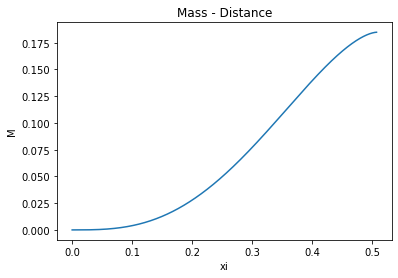

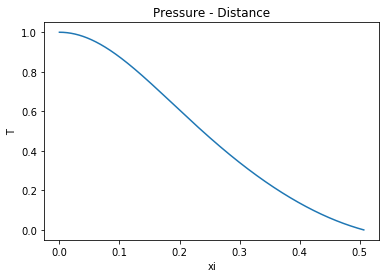

In [56]:
# Plots
plt.plot(XI,MU)
plt.xlabel("xi")
plt.ylabel("M")
plt.title("Mass - Distance")
plt.show()
plt.plot(XI,THETA)
plt.xlabel("xi")
plt.ylabel("T")
plt.title("Pressure - Distance")
plt.show()

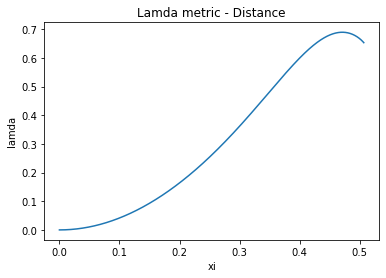

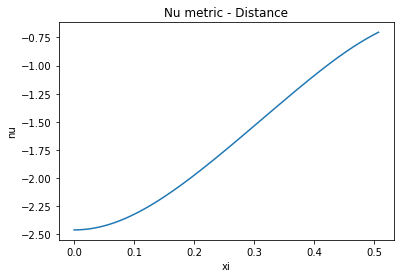

In [57]:
# metrics
data = open("metric.dat","w+")
data.write("\n\nxi\tlamda(xi)\tnu(xi)\n")
lamda = [] 
nu = []
count = 0
for i in XI:
    lamda.append(m.log(1/(1-2*MU[count]/i))/2)
    nu.append(m.log((a_0/(a_0+1))**(2*(n+1))*a_0/(a_0+2*XI[-1]*(n-1)*dT(XI[-1], THETA[-1], MU[-1]))*((a_0+1)/(a_0+THETA[count])**(2*(n+1))))/2)
    data.write(str(i)+"\t"+str(lamda[count])+"\t"+str(nu[count])+"\n")
    count += 1

# Plots
plt.plot(XI, lamda)
plt.xlabel("xi")
plt.ylabel("lamda")
plt.title("Lamda metric - Distance")
plt.show()
plt.plot(XI, nu)
plt.xlabel("xi")
plt.ylabel("nu")
plt.title("Nu metric - Distance")
plt.show()
data.close()